# Capstone 2 : NN2

# Sentiment Analysis on Social Media Posts with LSTM

In this project, you will build a `Long Short-Term Memory (LSTM) model` that can `perform sentiment analysis on text data`, such as social media posts, customer reviews, or news articles.

You will start by `exploring a dataset` of text data, such as the `Sentiment140 dataset` or `the Amazon Reviews dataset`, and `performing EDA` to gain insights into the data.

You will `analyze the correlation` between different features and `identify any outliers` or `missing values` that need to be handled.

You will then `preprocess the dataset`, `splitting it into training and testing sets`, and `transforming the text data` into input vectors using techniques such as `tokenization` or `word embeddings`.

You will `build an LSTM model` using PyTorch or `Tensorflow` that can perform sentiment analysis on the input data.

You will `experiment with different neural network` architectures, activation functions, and learning rates to find the `best model` for the task.

Finally, you will `evaluate the performance` of your model using metrics such as `accuracy`, `precision`, `recall`, and `F1 score`, and `visualize the results` using `confusion matrices` or other visualization techniques to see how well the model performs on different sentiment classes.

Dataset URL:

The Sentiment140 dataset contains `1.6 million tweets` with `6 different sentiment classes`: positive, negative, neutral, and three other classes.
`Sentiment140` dataset: http://help.sentiment140.com/for-students/

The Amazon Reviews dataset contains `3.6 million reviews` with `binary sentiment classes`: positive or negative.
`Amazon Reviews` dataset: https://www.kaggle.com/bittlingmayer/amazonreviews

This project will give you hands-on experience with LSTM and sentiment analysis, and will help you develop skills in coding with PyTorch and Tensorflow.

It will also give you the opportunity to experiment with different neural network architectures and activation functions to find the best model for the task.

verify GPU

In [15]:
# import tensorflow as tf
# print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "not available")

# Data Acquisition

In [16]:
# !pip install kaggle

Upload the kaggle.json file that you downloaded

In [17]:
# from google.colab import files

In [18]:
# uploaded = files.upload()
# uploaded

Move the uploaded kaggle.json file to the appropriate directory

In [19]:
# import os
# os.makedirs('/root/.kaggle', exist_ok=True)
# os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

Set permissions for the Kaggle API key

In [20]:
# !chmod 600 /root/.kaggle/kaggle.json

Download a dataset from Kaggle

In [21]:
# !kaggle datasets download -d bittlingmayer/amazonreviews -p /content

Unzip the downloaded dataset

In [22]:
# !unzip -q /content/amazonreviews.zip -d /content/dataset


read data

In [23]:
import pandas as pd

Amazon Reviews

In [24]:
df_train = pd.read_csv(r'dataset\train.ft.txt', delimiter='\t', header=None, names=['text', 'label']).sample(50000)
df_train.head()

,text,label
1559061,__label__1 isn't that great: this cd isn't all...,NaN
420646,__label__1 Real Mediocre Late 90's stuff: 1998...,NaN
705221,__label__2 Country music with an attitude!!!: ...,NaN
3176663,__label__2 Perfect Wedding Ceremony Music: Thi...,NaN
546329,"__label__2 Awesome movie!: However, the print ...",NaN


we have a problem in dataset, pandas read two column in one column !!

In [25]:
row = '__label__1 Not an "ultimate guide": Firstly,I enjoyed the format and tone of the book (how the author addressed the reader). However, I did not feel that she imparted any insider secrets that the book promised to reveal. If you are just starting to research law school, and do not know all the requirements of admission, then this book may be a tremendous help. If you have done your homework and are looking for an edge when it comes to admissions, I recommend some more topic-specific books. For example, books on how to write your personal statment, books geared specifically towards LSAT preparation (Powerscore books were the most helpful for me), and there are some websites with great advice geared towards aiding the individuals whom you are asking to write letters of recommendation. Yet, for those new to the entire affair, this book can definitely clarify the requirements for you.'
label = [0 if row.split(' ')[0] == '__label__1' else 1]
label

[0]

In [26]:
text = ' '.join(row.split(' ')[1:])
text

'Not an "ultimate guide": Firstly,I enjoyed the format and tone of the book (how the author addressed the reader). However, I did not feel that she imparted any insider secrets that the book promised to reveal. If you are just starting to research law school, and do not know all the requirements of admission, then this book may be a tremendous help. If you have done your homework and are looking for an edge when it comes to admissions, I recommend some more topic-specific books. For example, books on how to write your personal statment, books geared specifically towards LSAT preparation (Powerscore books were the most helpful for me), and there are some websites with great advice geared towards aiding the individuals whom you are asking to write letters of recommendation. Yet, for those new to the entire affair, this book can definitely clarify the requirements for you.'

In [27]:
df_train['label'] = df_train['text'].apply(lambda row: 0 if row.split(' ')[0] == '__label__1' else 1)
df_train['text'] = df_train['text'].apply(lambda row: ' '.join(row.split(' ')[1:]))
df_train.head()

,text,label
1559061,isn't that great: this cd isn't all that great...,0
420646,"Real Mediocre Late 90's stuff: 1998, probably ...",0
705221,Country music with an attitude!!!: Shania Twai...,1
3176663,Perfect Wedding Ceremony Music: This CD was ex...,1
546329,"Awesome movie!: However, the print is a bit gr...",1


great.. let's read test data too

In [28]:
df_test = pd.read_csv(r'dataset\test.ft.txt', delimiter='\t', header=None, names=['text', 'label']).sample(10000)
df_test.head()

,text,label
43269,__label__2 very good deal: looking for this fo...,NaN
247270,__label__2 Logical but not radical: O'Reilly's...,NaN
267554,__label__1 Muddy Concept Never Clears: With th...,NaN
263962,__label__2 A must have in one's collection!: M...,NaN
322383,__label__2 Glamorous Biography: Here is some H...,NaN


In [29]:
df_test['label'] = df_test['text'].apply(lambda row : 0 if row.split(' ')[0] == '__label__1' else 1)
df_test['text'] = df_test['text'].apply(lambda row : ' '.join(row.split(' ')[1:]))
df_test.head()

,text,label
43269,very good deal: looking for this for a long ti...,1
247270,Logical but not radical: O'Reilly's exceptiona...,1
267554,Muddy Concept Never Clears: With the cast that...,0
263962,"A must have in one's collection!: Man, am i gl...",1
322383,Glamorous Biography: Here is some Hollywood hi...,1


# Data Exploration

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 1559061 to 3433264
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50000 non-null  object
 1   label   50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 43269 to 3054
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   label   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 234.4+ KB


two dataframe not included missing values

cjeck duplicated

In [33]:
df_train.duplicated().sum()

0

In [34]:
df_test.duplicated().sum()

0

two dataframe not included duplicated values

check balanced

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


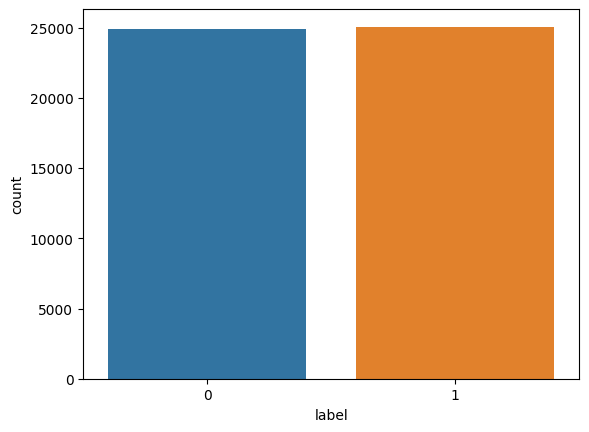

In [35]:
sns.countplot(x='label', data=df_train)
plt.show()


c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


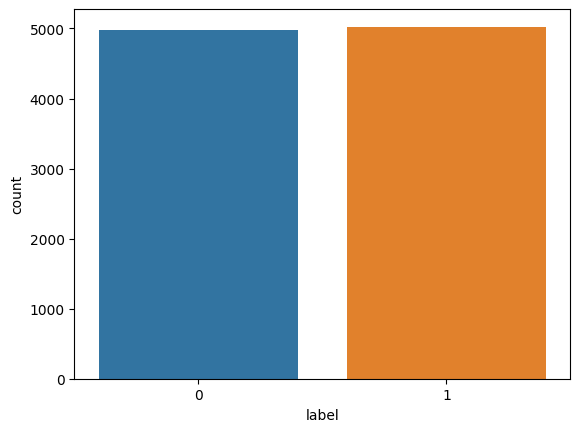

In [36]:
sns.countplot(x='label', data=df_test)
plt.show()


two dataframe are balanced

check text length

In [37]:
df_train['text_length'] = df_train['text'].apply(len)
df_train.head()

,text,label,text_length
1559061,isn't that great: this cd isn't all that great...,0,392
420646,"Real Mediocre Late 90's stuff: 1998, probably ...",0,321
705221,Country music with an attitude!!!: Shania Twai...,1,433
3176663,Perfect Wedding Ceremony Music: This CD was ex...,1,564
546329,"Awesome movie!: However, the print is a bit gr...",1,132


c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


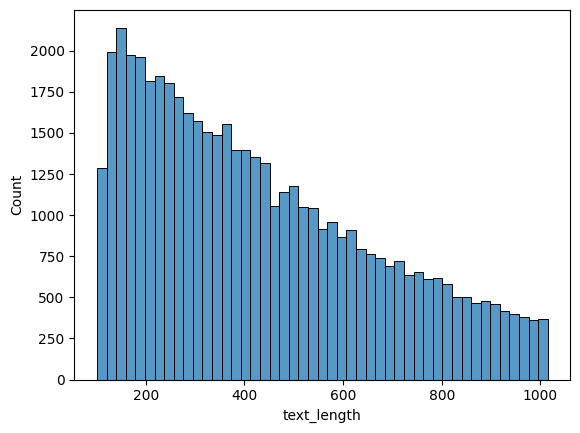

In [38]:
sns.histplot(df_train['text_length'])
plt.show()

most text length is in range 200 characters

In [39]:
df_test['text_length'] = df_test['text'].apply(len)
df_test.head()

,text,label,text_length
43269,very good deal: looking for this for a long ti...,1,140
247270,Logical but not radical: O'Reilly's exceptiona...,1,631
267554,Muddy Concept Never Clears: With the cast that...,0,347
263962,"A must have in one's collection!: Man, am i gl...",1,654
322383,Glamorous Biography: Here is some Hollywood hi...,1,355


c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


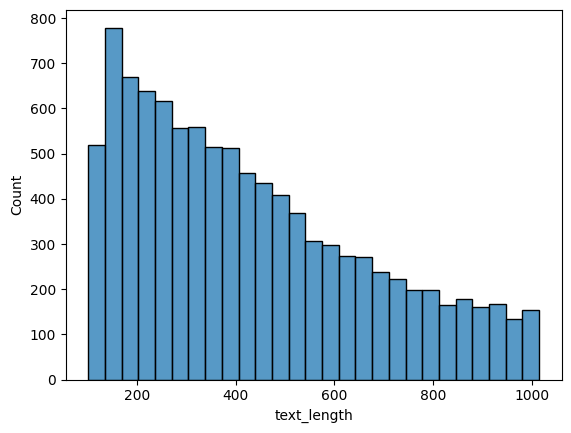

In [40]:
sns.histplot(df_test['text_length'])
plt.show()

most text length is in range 200 characters

Explore correlations between features

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


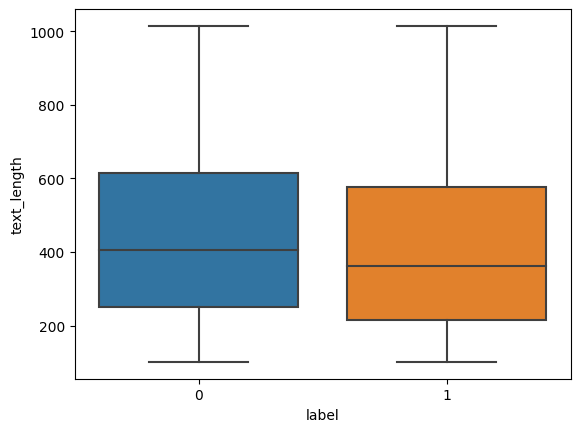

In [41]:
sns.boxplot(x='label', y='text_length', data = df_train)
plt.show()

most text length is in range 400 characters

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


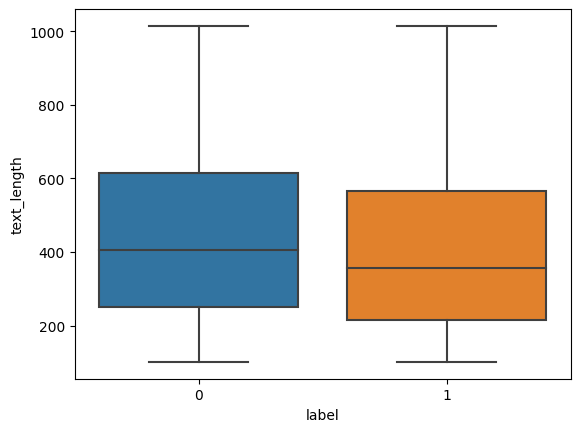

In [42]:
sns.boxplot(x='label', y='text_length', data = df_test)
plt.show()

most text length is in range 400 characters

# Data Preparation

In [43]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CENTER_ELRahama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CENTER_ELRahama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CENTER_ELRahama\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
def preprocess_text_series(series):
    # Regular expression substitutions
    series = series.str.replace('\d', '0')
    series = series.str.replace(r"([^ ]+(?<=\.[a-z]{3}))", "<url>")

    # Remove stop words and apply stemming and lemmatization
    stop_words = set(stopwords.words('english'))
    excluding = ['againts', 'not', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn',
                 "didn't",'doesn', "doesn't", 'hadn', "hadn't", 'has', "hasn't", 'haven', "haven't", 'isn',
                 "isn't", 'might', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shouldn', "shouldn't",
                 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

    stop_words = [word for word in stop_words if word not in excluding]

    ps = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    # Tokenize the text
    words = series.str.split()

    # Remove stop words, apply stemming, and lemmatization
    filtered_words = [
        ' '.join([lemmatizer.lemmatize(ps.stem(word.lower())) for word in words if word.lower() not in stop_words])
        for words in words
    ]

    return filtered_words

In [45]:
# df_train['cleaned_text'] = df_train['text'].apply(preprocess_text)
df_train['cleaned_text'] = preprocess_text_series(df_train['text'])
df_train.head()

,text,label,text_length,cleaned_text
1559061,isn't that great: this cd isn't all that great...,0,392,isn't great: cd isn't great. song like bob sti...
420646,"Real Mediocre Late 90's stuff: 1998, probably ...",0,321,"real mediocr late 90' stuff: 1998, probabl bor..."
705221,Country music with an attitude!!!: Shania Twai...,1,433,countri music attitude!!!: shania twain ha don...
3176663,Perfect Wedding Ceremony Music: This CD was ex...,1,564,perfect wed ceremoni music: cd exactli look se...
546329,"Awesome movie!: However, the print is a bit gr...",1,132,"awesom movie!: however, print bit grainy. that..."


In [46]:
# df_test['cleaned_text'] = df_test['text'].apply(preprocess_text)
df_test['cleaned_text'] = preprocess_text_series(df_test['text'])
df_test.head()

,text,label,text_length,cleaned_text
43269,very good deal: looking for this for a long ti...,1,140,good deal: look long time abl get mp3 download...
247270,Logical but not radical: O'Reilly's exceptiona...,1,631,logic not radical: o'reilly' except analyt abi...
267554,Muddy Concept Never Clears: With the cast that...,0,347,"muddi concept never clears: cast ""red lights"" ..."
263962,"A must have in one's collection!: Man, am i gl...",1,654,"must one' collection!: man, glad purchas one a..."
322383,Glamorous Biography: Here is some Hollywood hi...,1,355,glamor biography: hollywood histori written gl...


Split text

In [47]:
X_train, X_test, y_train, y_test = df_train['cleaned_text'], df_test['cleaned_text'], df_train['label'], df_test['label']
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (50000,)
X_test: (10000,)
y_train: (50000,)
y_test: (10000,)


Tokenize the text data

In [48]:
max_features = 10000

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenizer

In [49]:
total_words = len(tokenizer.word_index) + 1
total_words

85138

Convert text to sequences and pad them

In [50]:
maxlen = 100

X_train_sequences = pad_sequences(tokenizer.texts_to_sequences(X_train),
                                  maxlen=maxlen)
X_train_sequences

array([[   0,    0,    0, ...,    9,    3, 1177],
       [   0,    0,    0, ...,   26,    1,  989],
       [   0,    0,    0, ...,    9, 3191,  391],
       ...,
       [   0,    0,    0, ...,  358,   48,    6],
       [   0,    0,    0, ...,    5,  213,  286],
       [   0,    0,    0, ..., 1842,   13,  211]])

In [51]:
X_test_sequences = pad_sequences(tokenizer.texts_to_sequences(X_test),
                                 maxlen=maxlen)
X_test_sequences

array([[   0,    0,    0, ...,  315,    5, 1025],
       [   0,    0,    0, ...,  834,  576, 4005],
       [   0,    0,    0, ...,  107,  354, 1383],
       ...,
       [   0,    0,    0, ...,   69, 1109, 3502],
       [   0,    0,    0, ...,   48,    4,  570],
       [   0,    0,    0, ...,    3,  156, 3671]])

# Build LSTM Model

In [52]:
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras import regularizers
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [53]:
model = models.Sequential()
model.add(layers.Embedding(total_words, output_dim=64))
model.add(layers.Bidirectional(layers.LSTM(64, activation='tanh', return_sequences=True)))
model.add(layers.Dropout(0.5))

model.add(layers.Bidirectional(layers.LSTM(32, activation='tanh',)))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid', 
                       kernel_regularizer=regularizers.l2(0.01)) # decrease overfitting
          )

In [54]:
model.compile(optimizer=optimizers.Adam(), # update weights
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          5448832   
                                                                 
 bidirectional (Bidirection  (None, None, 128)         66048     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 6

# Train the Model

In [56]:
# Train the model
hist = model.fit(X_train_sequences,
          y_train,
          epochs=5,
          validation_data=(X_test_sequences, y_test))
hist

Epoch 1/5


1563/1563 [==============================] - 436s 264ms/step - loss: 0.3617 - accuracy: 0.8493 - val_loss: 0.2832 - val_accuracy: 0.8844
Epoch 2/5
1563/1563 [==============================] - 366s 234ms/step - loss: 0.2325 - accuracy: 0.9164 - val_loss: 0.2756 - val_accuracy: 0.8893
Epoch 3/5
1563/1563 [==============================] - 378s 242ms/step - loss: 0.1840 - accuracy: 0.9369 - val_loss: 0.2892 - val_accuracy: 0.8818
Epoch 4/5
1563/1563 [==============================] - 391s 250ms/step - loss: 0.1401 - accuracy: 0.9551 - val_loss: 0.3363 - val_accuracy: 0.8825
Epoch 5/5
1563/1563 [==============================] - 349s 223ms/step - loss: 0.1151 - accuracy: 0.9658 - val_loss: 0.3474 - val_accuracy: 0.8797


# Displaying Metrics for trian and test set

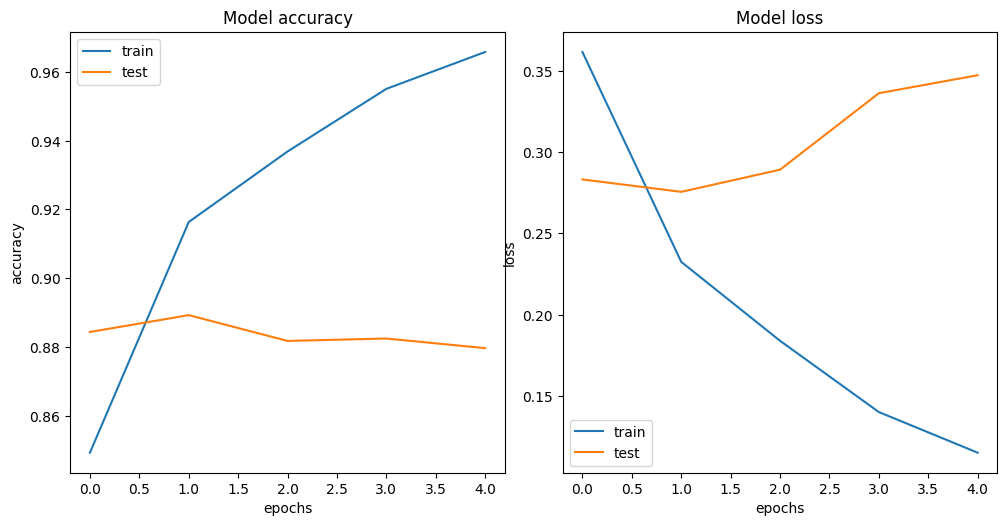

In [57]:
def show_metrics(hist):
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    ax = ax.ravel()
    plt.tight_layout()

    for i, metr in enumerate(['accuracy', 'loss']):
        ax[i].plot(hist.history[metr])
        ax[i].plot(hist.history['val_' + metr])
        ax[i].set_title(f'Model {metr}')
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(metr)
        ax[i].legend(['train', 'test'])

    plt.show()

show_metrics(hist)

# Evaluate Model Performance

In [58]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

accuracy score

In [59]:
preds = model.predict(X_test_sequences)
test_acc = np.round(accuracy_score(y_test, np.round(preds)) * 100, 2)
test_acc

313/313 [==============================] - 19s 44ms/step


87.97

In [60]:
train_acc = np.round((hist.history['accuracy'][-1] * 100, 2))[0]
train_acc

97.0

Classification report for Precision, Recall and F1-score

In [61]:
cr = classification_report(y_test, np.round(preds))
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4975
           1       0.90      0.86      0.88      5025

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Confusion matrix

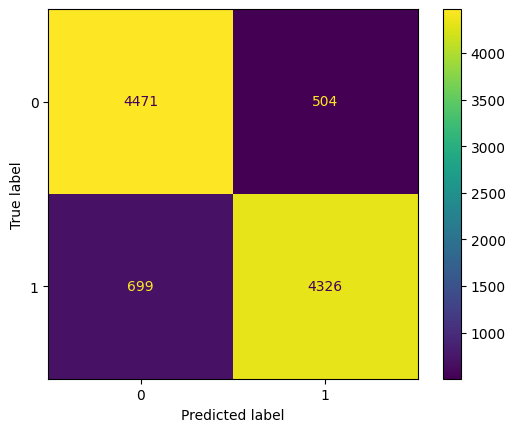

In [62]:
cm = confusion_matrix(y_test, np.round(preds))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()